# Definition

## Project Overview

## Problem Statement

## Metrics

# Analysis

## Data Exploration

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
%matplotlib inline

import plot_helper

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The data set for this project was downloaded from Kaggle at  
[8anu climbing logbook](https://www.kaggle.com/dcohen21/8anu-climbing-logbook)

In [3]:
# Connect to db
conn = sqlite3.connect('data/8anu.sqlite')

# Read data into pandas
sql = ('SELECT a.id, a.country AS crag_country, a.crag_id, a.crag, a.sector_id, a.sector, a.name AS route, '
       'a.grade_id, g.fra_routes AS grade, a.year, a.date, a.method_id, m.shorthand AS method, a.notes, a.raw_notes, a.rating, '
       'a.user_id, u.country AS user_country, u.city AS user_city, u.sex, u.height, u.weight, u.birth AS birthdate, u.started AS started_climbing '
       'FROM ('
           'SELECT * '
           'FROM ascent '
           'WHERE crag=\'Frankenjura\' AND climb_type=0'
       ') AS a '
       'LEFT OUTER JOIN grade AS g ON a.grade_id=g.id '
       'LEFT OUTER JOIN method AS m ON a.method_id=m.id '
       'LEFT OUTER JOIN user AS u ON a.user_id=u.id '
       )
df = pd.read_sql_query(sql, conn)

# Close db connection
conn.close()

In [4]:
# Export to .csv for submitting Project Proposal to Udacity
#df.to_csv('data/8anu_franken.csv', sep=';')

In [5]:
# Export to .xlsx
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('data/8anu_franken.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
#df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
#writer.save()

### General information about the data set

In [6]:
## Get a list of all columns
df.columns

Index(['id', 'crag_country', 'crag_id', 'crag', 'sector_id', 'sector', 'route',
       'grade_id', 'grade', 'year', 'date', 'method_id', 'method', 'notes',
       'raw_notes', 'rating', 'user_id', 'user_country', 'user_city', 'sex',
       'height', 'weight', 'birthdate', 'started_climbing'],
      dtype='object')

In [7]:
df.head(5)

,id,crag_country,crag_id,crag,sector_id,sector,route,grade_id,grade,year,...,raw_notes,rating,user_id,user_country,user_city,sex,height,weight,birthdate,started_climbing
0,582,DEU,16600,Frankenjura,126,Grüne Hölle,Isolation,46,6c+,2000,...,0,0,39,NLD,Eindhoven,0.0,178.0,78.0,1972-10-16,1996.0
1,805,DEU,16600,Frankenjura,111,Marientaler Wände,Kraftfeld,59,7c+,1999,...,0,0,32,SWE,Gothenburg,0.0,174.0,0.0,1976-06-15,1996.0
2,902,DEU,16600,Frankenjura,1309,Obere Schlossbergwände,Ursus,49,7a,2000,...,0,0,49,SWE,GÖTEBORG,0.0,0.0,0.0,None,1990.0
3,903,DEU,16600,Frankenjura,0,,Don't know name,46,6c+,2000,...,0,0,49,SWE,GÖTEBORG,0.0,0.0,0.0,None,1990.0
4,935,DEU,16600,Frankenjura,422,Richard Wagner Fels,Fight Gravity,53,7b,1999,...,0,0,3,SWE,Umeå,0.0,180.0,78.0,1973-09-09,1995.0


In [8]:
records_count = df.shape[0]
ratings_count = df[ df['rating'] == 0].shape[0]


f'There are {records_count:,} data entries in our dataset.'
f'{ratings_count:,} out of these contain a rating. That is approx. {ratings_count / records_count * 100:.2f}%'

'There are 114,589 data entries in our dataset.'

'60,303 out of these contain a rating. That is approx. 52.63%'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114589 entries, 0 to 114588
Data columns (total 24 columns):
id                  114589 non-null int64
crag_country        114589 non-null object
crag_id             114589 non-null int64
crag                114589 non-null object
sector_id           114589 non-null int64
sector              114589 non-null object
route               114589 non-null object
grade_id            114589 non-null int64
grade               114589 non-null object
year                114589 non-null int64
date                114589 non-null int64
method_id           114589 non-null int64
method              114589 non-null object
notes               114589 non-null object
raw_notes           114589 non-null int64
rating              114589 non-null int64
user_id             114589 non-null int64
user_country        114587 non-null object
user_city           114587 non-null object
sex                 114587 non-null float64
height              114587 non-null fl

| <p align='left'>`Column` | <p align='left'>Description | <p align='center'> Datatype | <p align='center'> Use | 
|:------|:------|:------:|:------:| 
| <p align='left'>`crag_country` | <p align='left'>3-letter country code of the country where the crag is located. | <p align='center'> categorical | <p align='center'> no | 
| <p align='left'>`crag_id` | <p align='left'>Unique id for identifying each crag. | <p align='center'> int | <p align='center'> no | 
| <p align='left'>`crag` | <p align='left'>Name of the crag | <p align='center'> text | <p align='center'> no | 
| <p align='left'>`sector_id` | <p align='left'>Unique id for identifying each sector. | <p align='center'> int | <p align='center'> yes | 
| <p align='left'>`sector` | <p align='left'>Name of the sector. A sector is a specific area within a crag. | <p align='center'> text | <p align='center'> yes | 
| <p align='left'>`route` | <p align='left'>Name of the route the climber has climbed. | <p align='center'> text | <p align='center'> yes | 
| <p align='left'>`grade_id` | <p align='left'>Unique id for identifying each climbing grade. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`grade` | <p align='left'>Climbing grade given to that route as per the French grading system | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`year` | <p align='left'>Year the route was climbed | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`date` | <p align='left'>Date the route was climbed. The date format is number of seconds since 1970-01-01. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`method_id` | <p align='left'>Unique id for identifying each type of ascent. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`method` | <p align='left'>The type of ascent the climber made on that route. | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`notes` | <p align='left'>Additional information the climber provided for this climb, e.g. Soft graded, i.e. fairly easy climb for the given grade | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`raw_notes` | <p align='left'>Encoding of different notes and combination of notes | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`rating` | <p align='left'>Rating given to the climb by this climber. This is our target attribute. | <p align='center'> int | <p align='center'> target | 
| <p align='left'>`user_id` | <p align='left'>Unique id for this climber. | <p align='center'> int | <p align='center'> yes | 
| <p align='left'>`user_country` | <p align='left'>3-letter country code of the country where this climber is from. | <p align='center'> categorical | <p align='center'> statistics | 
| <p align='left'>`user_city` | <p align='left'>City where this climber is from | <p align='center'> text | <p align='center'> statistics | 
| <p align='left'>`sex` | <p align='left'>The climber's sex. 0 indicates male, 1 indicates female. | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`height` | <p align='left'>The climber's height in cm | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`weight` | <p align='left'>The climber's weight in kg | <p align='center'> int | <p align='center'> statistics | 
| <p align='left'>`birthdate` | <p align='left'>The climber's date of birth | <p align='center'> date | <p align='center'> statistics | 
| <p align='left'>`started_climbing` | <p align='left'>The year the climber started climbing. | <p align='center'> int | <p align='center'> statistics | ![image.png](attachment:image.png)

In the table above the column `Use` indicated how we plan to use the given column.
- `target` - this is a target attribute.
- `yes` - this column will be used during exploration and analysis.
- `no` - not planned to use that column during analysis and exploration.
- `statistics` - this column will not be used for analysis but may be interesting later on to do user statistics etc.

Drop unnecessary columns for analysis.

In [10]:
df = df.drop(columns=['crag_country',
                      'crag_id',
                      'crag',
                      'grade_id',
                      'grade',
                      'year',
                      'date',
                      'method_id',
                      'method',
                      'notes',
                      'raw_notes',
                      'user_country',
                      'user_city',
                      'sex',
                      'height',
                      'weight',
                      'birthdate',
                      'started_climbing'])

Split train and test set to avoid bias

In [11]:
from sklearn.model_selection import train_test_split

y = df.pop('rating')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Missing values

Let us take a look if we have **missing values** or **zero values**.

Number of missing values per column:

In [12]:
X_train.isnull().sum()
y_train.isnull().sum()

id           0
sector_id    0
sector       0
route        0
user_id      0
dtype: int64

0

Number of zero values per column:

In [13]:
(X_train == 0).sum()
(y_train == 0).sum()

id               0
sector_id    12276
sector           0
route            0
user_id          0
dtype: int64

48160

### Unique values

A naive estimate on the number of unique sectors and routes within these sectors. Submitted by a number of distinct users.

In [14]:
X_train[['sector_id', 'route', 'user_id']].nunique()

sector_id      350
route        12445
user_id       3298
dtype: int64

Why do we call the above estimate _naive_? 

According to (climb-europe.com)[http://www.climb-europe.com/RockClimbingGermany/RockClimbingFrankenjura.html] _there are approximately 1,000 crags spread out in a beautiful forest terrain_ (Note that _crags_ in the above quote is the same as _sectors_ in our dataset.) This seems fine since in our dataset there are 351 different sectors noted.

In the article it continues to claim that _Frankenjura boasts in excess of 10,000 routes._ Now this is where we should get a little suspicious. In only 350 sectors our dataset apparently contains already more than 12,000 routes - which is well above the 10,000 mentioned in the article.

Lets dig deeper here.


What are the records where `sector_id` is 0?  
We take a look at a number of samples.

In [15]:
X_train[X_train['sector_id'] == 0].head(10)

,id,sector_id,sector,route,user_id
68971,3382731,0,,Ohne name,27670
31882,1825241,0,Shlosbergwand,Erwin's Project,4424
46268,2498911,0,Hintere Treunitzer Wand,Alfatier,33829
31946,1838835,0,,supermakro,34789
3244,265901,0,,Nordwestkante,7455
13252,925241,0,,Mungersdorfer stadion,17636
27908,1675974,0,Huttenriss,Menschenfresser,5017
93256,4266734,0,,Treibjagd,25398
28962,1700919,0,,Coffin Surfer,11481
77410,3683726,0,,Shatreng,5511


## Exploratory Visualization

### Missing values

Lets look at the **Missing** or **Zero values** per column.

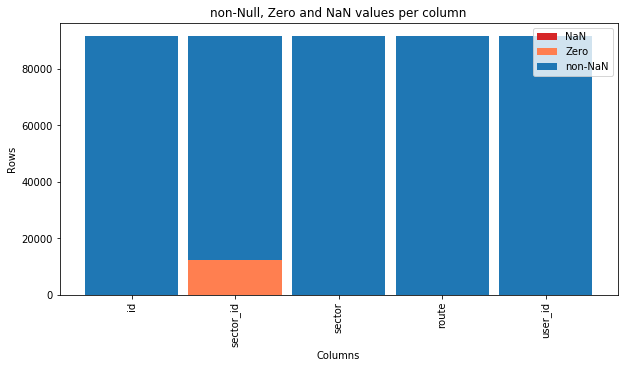

In [16]:
plot_helper.missing_values_overview(X_train)

In our data set `0` is in indicator for missing values, except for `sex` where `0` indicates `male` (and `1` for `female`).

From the graph above we can conclude that we have missing data in `sector_id`, `raw_notes`, `rating`, `height`, `weight`, `birth`, `started_climbing`.

Since `sector_id` and `rating` are important for our analysis, we have to consider what to do about those missing values during Data Preparation later on.

## Analysis of our target variable `rating`

What are the unique values of our target variable?

In [17]:
y_train.unique()

array([2, 1, 3, 0])

And how is their distribution?


In [18]:
percentages = round(y_train.value_counts().sort_index() / y_train.count() * 100, 1)
percentages

0    52.5
1    11.1
2    18.7
3    17.6
Name: rating, dtype: float64

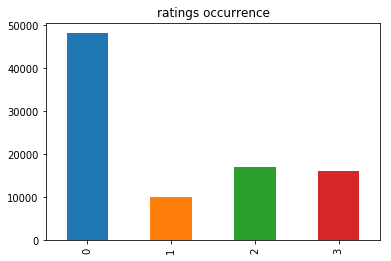

In [19]:
y_train.value_counts().sort_index().plot(
    kind='bar', title='ratings occurrence', xticks=percentages)

In [20]:
y_train[y_train != 0].describe()

count    43511.000000
mean         2.137735
std          0.766147
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: rating, dtype: float64

Out of those climbs, that were rated, the average is 2.14.

What is the percentage of users that rated at least one climb?

In [36]:
df_train_joined = X_train.copy()
df_train_joined['rating'] = y
(df_train_joined.groupby('user_id')['rating'].sum() == 0).value_counts()

False    2238
True     1060
Name: rating, dtype: int64

This means that approx. 2/3 of users have rated at least one item.

## Algorithms and Techniques

## Benchmark

# Methodology

## Data Preprocessing

In [22]:
df[df['sector'] == 'Wolfsberger Felsentor'].head(10)

,id,sector_id,sector,route,user_id
196,12446,0,Wolfsberger Felsentor,Himmelsleiter,493
109457,4806425,0,Wolfsberger Felsentor,Flying Duck,64408


In [23]:
from Levenshtein import distance    #http://www.coli.uni-saarland.de/courses/LT1/2011/slides/Python-Levenshtein.html
from Levenshtein import jaro_winkler
import time

# def 
jaro_winkler('Toni Schmid Ged.-Wand', 'Toni Schidt Gedenkwand')
# jaro_winkler('Toni Schmid Ged.-Wand', 'Toni Schmid Ge. Wand')
# jaro_winkler('Toni Schmid Ged.-Wand', 'Toni-Schid Gedenkwand')
# jaro_winkler('Toni Schmid Ged.-Wand', 'Toni-Schmid-Ged.W.')
# jaro_winkler('Toni Schmid Ged.-Wand', 'Toni-Schmid')
# jaro_winkler('Toni Schmid Ged.-Wand', 'Todesstern')

0.9682285035226212

In [24]:
import re

def removeNonAlpha(df, columns):
    '''Removes rows from dataframe where value within column is completely non-alphanumeric.
    Ex. '?', '???', '_-%$$'   '''
    
    # regex that matches non alphanumeric strings
    pattern = '^[^a-zA-Z\d\s:]*$'
        
    for col in columns:
        myfilter = df[col].str.contains(pattern)
        df = df[~myfilter]
    
    return df

Remove records with non-alphanumeric entries in columns `sector` or `route`.

In [25]:
df = removeNonAlpha(df, ['sector', 'route'])

In [26]:
df_sectorsZero = df[df['sector_id'] == 0][['sector_id', 'sector']]
df_sectorsZero.head(5)

,sector_id,sector
17,0,Kainachtaler Riesenüberhang
55,0,Spaßwand
121,0,Kaiserbachtaler Riesenüberhang
129,0,Kleinziegenfelder Wände (Klinge)
170,0,Spaßwand


In [27]:
df_sectorsNonZero = df[df['sector_id'] != 0].drop_duplicates('sector_id')[['sector_id', 'sector']]
df_sectorsNonZero.head(5)

,sector_id,sector
0,126,Grüne Hölle
1,111,Marientaler Wände
2,1309,Obere Schlossbergwände
4,422,Richard Wagner Fels
5,234,Stadeltenne


In [28]:
start = time.time()



routes_unique = df['route'].unique()
levenshtein_matrix = np.ones((routes_unique.size, routes_unique.size))

# examples = 0
# i = 0        
# while i <= len(routes_unique) - 1:
#     j = i + 1
#     while j <= len(routes_unique) - 1:
#         dist = distance(routes_unique[i], routes_unique[j])
#         if dist != 0:
#             levenshtein_matrix[i][j] = 1. / dist
#             if examples <= 10 and dist <= 3:
#                 f'{routes_unique[i]}, {routes_unique[j]}, {levenshtein_matrix[i][j]}, i={i}, j={j}'
#                 examples += 1
#         j += 1
#     i += 1
    
# threshold = 1. / 3

# levenshtein_matrix[levenshtein_matrix > threshold] = 1
# levenshtein_matrix

# i = 0        
# while i <= len(routes_unique) - 1:
#     j = 0
#     while j <= len(routes_unique) - 1:
#         if i != j and levenshtein_matrix[i][j] >= threshold:
# #             f'{routes_unique[i]}, {routes_unique[j]}, {levenshtein_matrix[i][j]}, i={i}, j={j}'
#         j += 1
#     i += 1

end = time.time()

f'This cell took {end - start} seconds to execute.'
        

'This cell took 0.6114389896392822 seconds to execute.'

## Implementation

## Refinement

# Results

## Model Evaluation and Validation

## Justification

# Conclusion

## Free-Form Visualization

## Reflection

## Improvement